In [52]:
import json

import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

In [53]:
df = pandas.read_csv("S06-hw-dataset-01.csv")
display(df.head())
display(df.info())
display(df.describe())
display(df["target"].value_counts())
display(df["target"].value_counts(normalize=True))

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

None

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


target
0    8119
1    3881
Name: count, dtype: int64

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

In [54]:
display(df.isna().sum())
display(df.dtypes)

id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [55]:
X = df.drop(columns=["target", "id"])
y = df["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Фиксация random_state обеспечивает воспроизводимость результатов
stratify гарантирует сохранение пропорций классов в train и test выборках

In [57]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print("DummyClassifier:")
print("Accuracy:", dummy_accuracy)
print("F1:", dummy_f1)

DummyClassifier:
Accuracy: 0.6766666666666666
F1: 0.0


In [58]:
logreg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            max_iter=1000,
            random_state=42
        ))
    ]
)

logreg_pipeline.fit(X_train, y_train)

y_pred_lr = logreg_pipeline.predict(X_test)
y_proba_lr = logreg_pipeline.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("F1:", lr_f1)
print("ROC-AUC:", lr_roc_auc)

Logistic Regression:
Accuracy: 0.8275
F1: 0.7076271186440678
ROC-AUC: 0.8746905312071505


DummyClassifier показывает Accuracy ≈ 0.68 при F1 = 0.0. Это означает, что модель всегда предсказывает самый частый класс и полностью игнорирует меньший класс.
Logistic Regression превосходит DummyClassifier по всем метрикам. Высокое значение ROC-AUC ≈ 0.87 указывает на хорошую способность модели разделять классы

In [59]:
dt = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

dt_search = GridSearchCV(
    dt,
    dt_param_grid,
    scoring="roc_auc",
    cv=5
)

dt_search.fit(X_train, y_train)
dt_best = dt_search.best_estimator_

y_pred_dt = dt_best.predict(X_test)
y_proba_dt = dt_best.predict_proba(X_test)[:, 1]

dt_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_dt),
    "f1": f1_score(y_test, y_pred_dt),
    "ROC-AUC": roc_auc_score(y_test, y_proba_dt)
}

dt_metrics

{'accuracy': 0.8766666666666667, 'f1': 0.8, 'ROC-AUC': 0.9069205157178407}

In [60]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    "n_estimators": [100],
    "max_depth": [5, 10],
    "min_samples_leaf": [1, 5]
}

rf_search = GridSearchCV(
    rf,
    rf_param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

rf_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "f1": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
}

rf_metrics

{'accuracy': 0.9116666666666666,
 'f1': 0.8519553072625698,
 'ROC-AUC': 0.9581328398760856}

In [61]:
gb = GradientBoostingClassifier(random_state=42)

gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3]
}

gb_search = GridSearchCV(
    gb,
    gb_param_grid,
    scoring="roc_auc",
    cv=5
)

gb_search.fit(X_train, y_train)
gb_best = gb_search.best_estimator_

gb_best.fit(X_train, y_train)

y_pred_gb = gb_best.predict(X_test)
y_proba_gb = gb_best.predict_proba(X_test)[:, 1]


In [62]:
gb_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_gb),
    "f1": f1_score(y_test, y_pred_gb),
    "ROC-AUC": roc_auc_score(y_test, y_proba_gb)
}

gb_metrics

{'accuracy': 0.91625, 'f1': 0.8633582596872875, 'ROC-AUC': 0.9610124866690365}

In [63]:
metrics_df = pd.DataFrame.from_dict(
    {
        "DecisionTree": dt_metrics,
        "RandomForest": rf_metrics,
        "GradientBoosting": gb_metrics
    },
    orient="index"
)

metrics_df

,accuracy,f1,ROC-AUC
DecisionTree,0.876667,0.800000,0.906921
RandomForest,0.911667,0.851955,0.958133
GradientBoosting,0.916250,0.863358,0.961012


In [64]:
result = permutation_importance(
    gb_best,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"
)

importances = pd.Series(
    result.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

importances.head(10)

num18    0.064236
num19    0.062233
num07    0.037773
num04    0.018985
num24    0.013921
num20    0.011506
num01    0.010847
num22    0.008710
num21    0.007748
num14    0.007436
dtype: float64

Наиболее важными признаками для GradientBoosting являются num18 и num19, остальные признаки вносят меньший вклад. Модель в основном опирается на несколько ключевых признаков, что делает её предсказания интерпретируемыми и позволяет выделить основные факторы, влияющие на классификацию.

In [65]:
metrics_df.to_json("artifacts/metrics_test.json", orient="index")

In [66]:
search_summaries = {
    "DecisionTree": {
        "best_params": dt_search.best_params_,
        "cv_score": dt_search.best_score_
    },
    "RandomForest": {
        "best_params": rf_search.best_params_,
        "cv_score": rf_search.best_score_
    },
    "GradientBoosting": {
        "best_params": gb_search.best_params_,
        "cv_score": gb_search.best_score_
    }
}

with open("artifacts/search_summaries.json", "w") as f:
    json.dump(search_summaries, f, indent=2)


In [67]:
joblib.dump(gb_best, "artifacts/best_model.joblib")

['artifacts/best_model.joblib']

In [68]:
best_model_name = "GradientBoosting"
best_model_params = gb_best.get_params()
best_model_metrics = gb_metrics

best_model_meta = {
    "best_model": best_model_name,
    "parameters": best_model_params,
    "metrics_test": best_model_metrics
}

with open("artifacts/best_model_meta.json", "w") as f:
    json.dump(best_model_meta, f, indent=2)


<Figure size 600x600 with 0 Axes>

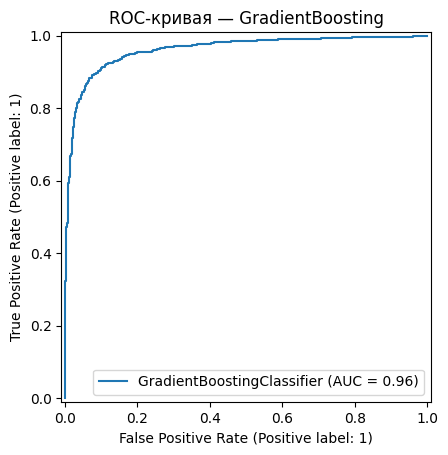

In [69]:
plt.figure(figsize=(6,6))
RocCurveDisplay.from_estimator(gb_best, X_test, y_test)
plt.title("ROC-кривая — GradientBoosting")
plt.savefig("artifacts/figures/roc_curve.png")
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(gb_best, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix — GradientBoosting")
plt.savefig("artifacts/figures/confusion_matrix.png")
plt.show()